In [20]:
%%capture
! pipinstall lightning  

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import lightning as L
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt

from torchvision import datasets,transforms

In [22]:
transform=transforms.Compose([transforms.ToTensor(),])


In [23]:
train=datasets.MNIST(root="./data",train=True,download=True,transform=transform)
test=datasets.MNIST(root="./data",train=False,download=True,transform=transform)


In [24]:
dl=DataLoader(train,batch_size=1280,shuffle=True,num_workers=3)
dltest=DataLoader(test,batch_size=1000,num_workers=3)

In [25]:
class Net(L.LightningModule):
    def __init__(self):
        super().__init__()
        L.seed_everything(seed=42)
        self.convolve1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3)
        self.convolve2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.maxpooling=nn.MaxPool2d(kernel_size=2,stride=2)
        self.pooltohidden=nn.Linear(in_features=6*6*64,out_features=128) #128 convention neuron out, (28-3-0)/1 +1 ie (inp-kernel+padding)/stride+bias
        self.hiddentoout=nn.Linear(in_features=128,out_features=10) #The max pooled matrix is half that of feature map
        self.loss=nn.CrossEntropyLoss()
        self.c=0

    def forward(self,x):
        self.c+=1
        if self.c<=1 :
            print(f"For Batch {self.c} , Shape of First Filter is {self.convolve1.weight.shape} \n")
            print(f"For Batch {self.c} , First Filter is {self.convolve1.weight} \n")
        feat=self.convolve1(x)
        feat=F.relu(feat)
        if self.c<=1 :
            print(f"For Batch {self.c} , Shape of First Features reLu(dot product) are {feat.shape} \n")
            print(f"For Batch {self.c} , First Features reLu(dot product) are {feat} \n")
        pool=self.maxpooling(feat)
        if self.c<=1 :
            print(f"For Batch {self.c} , Shape of the First Pooled Features are {pool.shape} \n")
            print(f"For Batch {self.c} , First Pooled Features are {pool} \n")
            print(f"For Batch {self.c} , Shape of the  Second Filter is {self.convolve2.weight.shape} \n")
            print(f"For Batch {self.c} , Second Filter is {self.convolve2.weight} \n")
        pool=self.convolve2(pool)
        pool=F.relu(pool)
        if self.c<=1:
            print(f"For Batch {self.c} , Shape of Second Features reLu(dot product) are {pool.shape} \n")
            print(f"For Batch {self.c} , Second Features reLu(dot product) are {pool} \n")
        pool2=self.maxpooling(pool)
        if self.c<=1:
            print(f" SHAPE OF THE Final Pooled vector Are {pool2.shape} \n")
            print(f"Final Pooled Vector Are {pool2} \n")
        pool2=torch.flatten(pool2,1)
        if self.c<=1:
            print(f" SHAPE OF THE Flatten Vector Are {pool2.shape} \n")
            print(f"Flatten Vector Are {pool2} \n")
        xi=self.pooltohidden(pool2)
        if self.c<=1:
            print(f" Number of layers  inside are {xi.shape} \n")
            print(f"Pool to Hidden, weight bias considered {xi} \n")
        yi=F.relu(xi)
        if self.c<=1:
            print(f"Number of layers going out are {yi.shape}\n")
            print(f"Y Value After ReLu {yi} \n")
        out=self.hiddentoout(yi)
        if self.c<=1:
            print(f"Number of Final output {out.shape}\n")
            print(f"Output Values {out} \n")
        return out
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.001)

    def training_step(self,batch,batch_idx):
        x,y=batch
        out=self.forward(x)
        loss=self.loss(out,y)
        return loss
        

In [26]:
model=Net()


Seed set to 42


In [27]:
trainer=L.Trainer(max_epochs=1)
trainer.fit(model, train_dataloaders=dl)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | convolve1    | Conv2d           | 320    | train
1 | convolve2    | Conv2d           | 18.5 K | train
2 | maxpooling   | MaxPool2d        | 0      | train
3 | pooltohidden | Linear           | 295 K  | train
4 | hiddentoout  | Linear           | 1.3 K  | train
5 | loss         | CrossEntropyLoss | 0      | train
----------------------------------------------------------
315 K     Trainable params
0         Non-trainable params
315 K     Total params
1.261     Total estimated model params size (MB)
6         Modules in train mode
0         Modules in eval mode


Training: |          | 0/? [00:00<?, ?it/s]

For Batch 1 , Shape of First Filter is torch.Size([32, 1, 3, 3]) 

For Batch 1 , First Filter is Parameter containing:
tensor([[[[ 0.2548,  0.2767, -0.0781],
          [ 0.3062, -0.0730,  0.0673],
          [-0.1623,  0.1958,  0.2938]]],


        [[[-0.2445,  0.2897,  0.0624],
          [ 0.2463,  0.0451,  0.1607],
          [-0.0471,  0.2570,  0.0493]]],


        [[[-0.1556,  0.0850, -0.1536],
          [-0.0391, -0.1354,  0.2211],
          [-0.2631, -0.1537, -0.0941]]],


        [[[-0.2004,  0.0315, -0.3292],
          [ 0.3010, -0.2832,  0.2573],
          [ 0.0555, -0.1082,  0.2060]]],


        [[[ 0.0520,  0.2693,  0.0364],
          [-0.1051,  0.0896, -0.0904],
          [ 0.1403,  0.2976,  0.1927]]],


        [[[-0.1457,  0.1924,  0.0596],
          [ 0.1693, -0.2032, -0.3300],
          [-0.1288, -0.2557,  0.2735]]],


        [[[ 0.0960,  0.1381,  0.1054],
          [-0.0058,  0.2609, -0.2368],
          [ 0.0210, -0.2275,  0.1028]]],


        [[[-0.1148,  0.1021, -0.06

`Trainer.fit` stopped: `max_epochs=1` reached.


In [28]:


for batch_num, (image, label) in enumerate(dl):
    
    prediction = model(image)
    
    probabilities = torch.softmax(prediction, dim=1)

    predicted_label = torch.argmax(probabilities, dim=1)
    
    print("Predicted label:", predicted_label)
    print("Original label:", label)
    print("\n")


Predicted label: tensor([7, 0, 9,  ..., 3, 6, 2])
Original label: tensor([7, 0, 9,  ..., 3, 6, 2])


Predicted label: tensor([1, 5, 5,  ..., 4, 0, 1])
Original label: tensor([1, 5, 8,  ..., 4, 0, 1])


Predicted label: tensor([7, 9, 9,  ..., 9, 5, 4])
Original label: tensor([7, 9, 9,  ..., 9, 5, 4])


Predicted label: tensor([1, 0, 1,  ..., 3, 3, 8])
Original label: tensor([1, 8, 1,  ..., 3, 3, 8])


Predicted label: tensor([4, 9, 6,  ..., 2, 5, 1])
Original label: tensor([4, 9, 6,  ..., 2, 5, 1])


Predicted label: tensor([2, 9, 3,  ..., 0, 1, 2])
Original label: tensor([2, 9, 8,  ..., 0, 1, 2])


Predicted label: tensor([9, 4, 7,  ..., 4, 1, 9])
Original label: tensor([9, 4, 7,  ..., 4, 1, 9])


Predicted label: tensor([4, 5, 3,  ..., 5, 9, 7])
Original label: tensor([9, 5, 3,  ..., 5, 9, 7])


Predicted label: tensor([1, 0, 0,  ..., 7, 4, 2])
Original label: tensor([1, 0, 0,  ..., 7, 4, 2])


Predicted label: tensor([6, 9, 0,  ..., 7, 2, 7])
Original label: tensor([6, 4, 0,  ..., 7,

In [29]:
path_to_checkpoint = trainer.checkpoint_callback.best_model_path
path_to_checkpoint

'/teamspace/studios/this_studio/lightning_logs/version_9/checkpoints/epoch=0-step=47.ckpt'

In [30]:
# trainer=L.Trainer(max_epochs=700)
# trainer.fit(model, train_dataloaders=dl,ckpt_path=path_to_checkpoint)

In [31]:
# for batch_num, (image, label) in enumerate(dl):
    
#     prediction = model(image)
    
#     probabilities = torch.softmax(prediction, dim=1)

#     predicted_label = torch.argmax(probabilities, dim=1)
    
#     print("Predicted label:", predicted_label)
#     print("Original label:", label)
#     print("\n")


In [32]:
torch.sum(torch.eq(torch.tensor(label), predicted_label)) / len(predicted_label)

/tmp/ipykernel_20940/513388415.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sum(torch.eq(torch.tensor(label), predicted_label)) / len(predicted_label)


tensor(0.9045)

<h1>Testing Data</h1>

In [33]:
actual_labels_array = []
predicted_labels_array = []


for batch_num, (image, label) in enumerate(dltest):
    
    prediction = model(image)
    
    probabilities = torch.softmax(prediction, dim=1)
    
    predicted_label = torch.argmax(probabilities, dim=1)
    actual_labels_array.extend(label.tolist())
    predicted_labels_array.extend(predicted_label.tolist())
    print("Predicted label:", predicted_label)
    print("Original label:", label)
    print("\n")


Predicted label: tensor([7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 4, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 0, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 4, 4, 4, 9, 9,
        5, 4, 7, 6, 7, 9, 3, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1,
        9, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 4, 5, 4, 5,
        1, 4, 4, 7, 2, 3, 2, 1, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1,
        0, 9, 0, 2, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0,
        3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1,
        5, 3, 8, 7, 2, 5, 0, 6, 4, 2, 9, 1, 9, 5, 7, 7, 2, 1, 2, 0, 8, 3, 7, 7,
        9, 1, 0, 1, 5, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4,
        1, 5, 4, 2, 9, 

In [35]:
torch.sum(torch.eq(torch.tensor(label), predicted_label)) / len(predicted_label)

/tmp/ipykernel_20940/513388415.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.sum(torch.eq(torch.tensor(label), predicted_label)) / len(predicted_label)


tensor(0.9120)

<h1>Correctly classifies digits by 91.20%</h1>

Predicted are [7, 2, 1, 0, 4, 1, 4, 9, 4, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4] 
 Actual are[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]


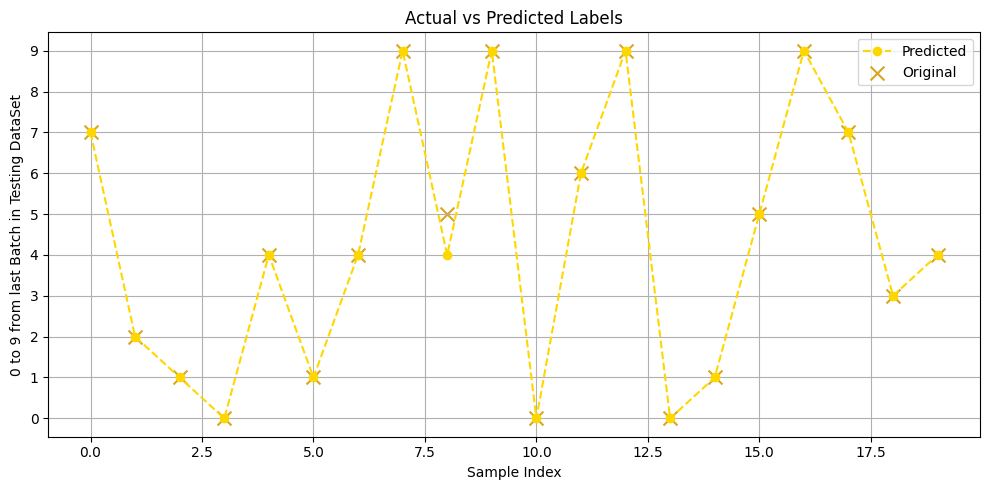

In [36]:
import matplotlib.pyplot as plt

N = 20
print(f"Predicted are {predicted_labels_array[:N]}",f"\n Actual are{actual_labels_array[:N]}")
x_axis = list(range(N))

plt.figure(figsize=(10, 5))

plt.plot(x_axis,predicted_labels_array[:N], label="Predicted", linestyle='--', marker='o', color='gold')
plt.scatter(x_axis, actual_labels_array[:N] , label="Original", color='goldenrod', marker='x', s=100)

plt.xlabel("Sample Index")
plt.ylabel("0 to 9 from last Batch in Testing DataSet")
plt.title("Actual vs Predicted Labels")
plt.legend()
plt.grid(True)
plt.yticks(range(10))
plt.tight_layout()
plt.show()
